<a href="https://colab.research.google.com/github/leandramvale/python-machine-learning-vendas/blob/main/Case_pr%C3%A1tico_(Workshop).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação e Limpeza do Dataset

In [ ]:
#biblioteca para importação do arquivo
from google.colab import files

In [ ]:
#carregar o arquivo do dataset - tipo csv
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
#biblioteca para manipulação de dados
import pandas as pd

In [ ]:
#carregar o dataset em um objeto dataframe da biblioteca pandas
df = pd.read_csv('data.csv', encoding='latin1')
#mostrar o dataset
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
#mostrar as informações dos campos do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# 4. Converter InvoiceDate para datetime (essencial para análise temporal)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
#mostrar algumas estatísicas dos dados
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#mostrar a configuração [linha,coluna] do datate
df.shape

(541909, 8)

In [ ]:
#mostrar o nome das colunas
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
#renomear as colunas para colocar no portugues
#dicionário de renomeação
novos_nomes = {
    'InvoiceNo': 'FaturaNro',
    'StockCode': 'CodProduto',
    'Description': 'Produto',
    'Quantity': 'Quantidade',
    'InvoiceDate': 'DataFatura',
    'UnitPrice': 'PrecoUnitario',
    'CustomerID': 'CodCliente',
    'Country': 'Pais'
}

#aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

#verificando resultado
df.head()

,FaturaNro,CodProduto,Produto,Quantidade,DataFatura,PrecoUnitario,CodCliente,Pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#o método .value_counts() serve para contar quantas vezes cada valor único aparece em uma coluna.
df['Pais'].value_counts()

,count
Pais,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


In [ ]:
#antes de prosserguir é necessário fazer uma limpeza nos dados
# 1.Limpeza de Dados Fundamental
# Remover linhas com Cliente nulo, pois não podemos segmentar clientes anônimos
df.dropna(subset=['CodCliente'], inplace=True)
# Converte o campo código do cliente de um float64 para int
df['CodCliente'] = df['CodCliente'].astype(int)

In [ ]:
# Remover transações com Quantidade negativa (consideradas cancelamentos/devoluções)
# e PrecoUnitario <= 0
df = df[(df['Quantidade'] > 0) & (df['PrecoUnitario'] > 0)]

In [ ]:
# 2. Engenharia de Feature: Calcular o Valor Total por Item
df['ValorTotal'] = df['Quantidade'] * df['PrecoUnitario']

/tmp/ipython-input-3050273357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ValorTotal'] = df['Quantidade'] * df['PrecoUnitario']


In [ ]:
#visualizar o dataset
df

,FaturaNro,CodProduto,Produto,Quantidade,DataFatura,PrecoUnitario,CodCliente,Pais,ValorTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,16.60


In [ ]:
#3. converter InvoiceDate para datetime (essencial para análise temporal)
df['DataFatura'] = pd.to_datetime(df['DataFatura'])

/tmp/ipython-input-507270750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DataFatura'] = pd.to_datetime(df['DataFatura'])


In [ ]:
#visualizar o dataset
df

,FaturaNro,CodProduto,Produto,Quantidade,DataFatura,PrecoUnitario,CodCliente,Pais,ValorTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [ ]:
#verificar se existem mais campos nulos
df.isnull()

,FaturaNro,CodProduto,Produto,Quantidade,DataFatura,PrecoUnitario,CodCliente,Pais,ValorTotal
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
FaturaNro,0
CodProduto,0
Produto,0
Quantidade,0
DataFatura,0
PrecoUnitario,0
CodCliente,0
Pais,0
ValorTotal,0


In [ ]:
print("Preparação concluída. Dataset limpo contém", df.shape[0], "linhas.")

Preparação concluída. Dataset limpo contém 397884 linhas.


#Visualização dos Dados (Análise Descritiva)

Com isso já conseguimos responder algumas perguntas, como:

1. Quais são os 10 produtos (Descrição ou Código do Produto) mais vendidos em termos de quantidade total?
2. Qual país gerou o maior valor total de receita (vendas)? E qual é a proporção dessa receita em relação ao total global?
3. Qual é o valor médio de um pedido (agrupando por Nro. da Fatura) e qual é o pedido de maior valor registrado?
4. Quais são os 5 clientes (top Five) que mais gastaram no período total do dataset?
5. Existe alguma sazonalidade nas vendas? Qual é o mês com maior e menor receita registrada?

In [ ]:
#bibliotecas para analise descritiva
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configuração de estilo para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Tamanho padrão dos gráficos


--- 2. Top 10 Produtos Mais Vendidos (por Quantidade) ---

| Produto                            | Quantidade   |
|:-----------------------------------|:-------------|
| MINI PAINT SET VINTAGE             | 26076        |
| RABBIT NIGHT LIGHT                 | 27202        |
| POPCORN HOLDER                     | 30931        |
| PACK OF 72 RETROSPOT CAKE CASES    | 33693        |
| ASSORTED COLOUR BIRD ORNAMENT      | 35362        |
| WHITE HANGING HEART T-LIGHT HOLDER | 36725        |
| JUMBO BAG RED RETROSPOT            | 46181        |
| WORLD WAR 2 GLIDERS ASSTD DESIGNS  | 54415        |
| MEDIUM CERAMIC TOP STORAGE JAR     | 77916        |
| PAPER CRAFT , LITTLE BIRDIE        | 80995        |


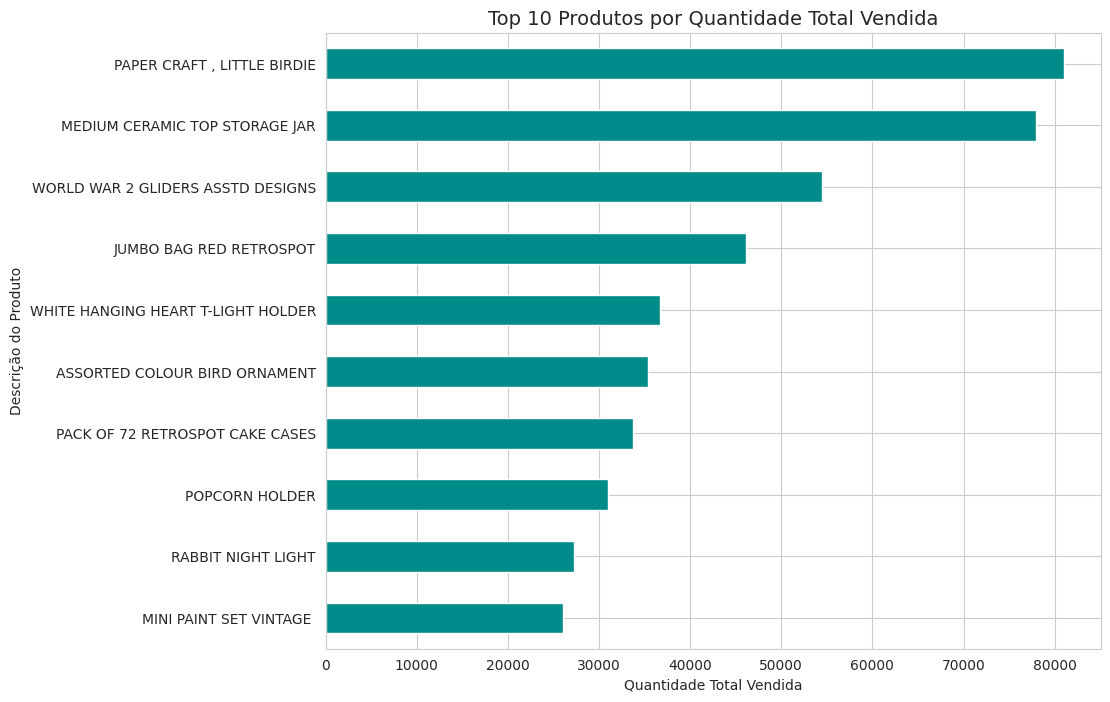

In [ ]:
# 1. Quais são os 10 produtos (Descrição ou Código do Produto) mais vendidos em termos de quantidade total?
# Agrupar por produto e somar a quantidade
top_10_products = df.groupby('Produto')['Quantidade'].sum().nlargest(10).sort_values(ascending=True)

print("\n--- 2. Top 10 Produtos Mais Vendidos (por Quantidade) ---\n")
print(top_10_products.to_markdown(numalign="left", stralign="left"))

# 2. Visualização (Gráfico de Barras)
plt.figure(figsize=(10, 8))
top_10_products.plot(kind='barh', color='darkcyan')
plt.title('Top 10 Produtos por Quantidade Total Vendida', fontsize=14)
plt.xlabel('Quantidade Total Vendida')
plt.ylabel('Descrição do Produto')
plt.show()


--- 3. Análise de Receita por País ---

O país com maior receita é: United Kingdom
Receita Total do United Kingdom: R$ 7,308,391.55
Proporção da receita do 7308391.5540000005 em relação ao total global: 82.01%


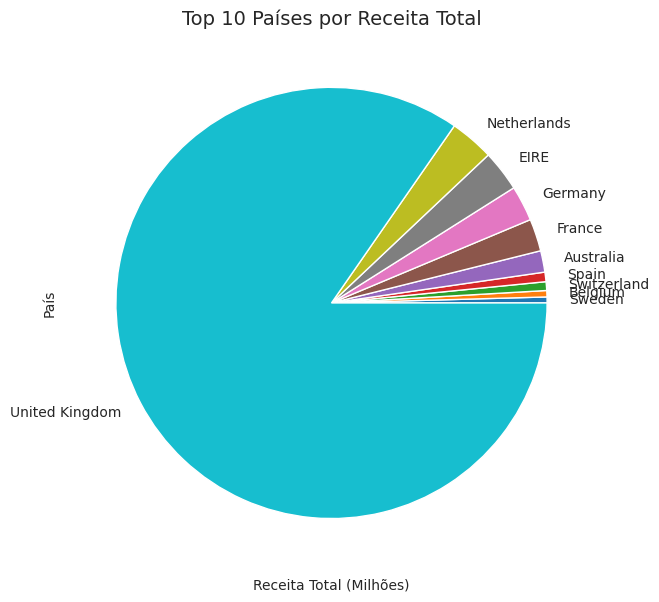

In [ ]:
# 2. Qual país gerou o maior valor total de receita (vendas)? E qual é a proporção dessa receita em relação ao total global?
# Agrupar por país e calcular a Receita (ValorTotal)
pais_valortotal = df.groupby('Pais')['ValorTotal'].sum().sort_values(ascending=False)

# 2. Identificar o país principal
primeiro_pais = pais_valortotal.index[0]
primeiro_pais_valortotal = pais_valortotal.iloc[0]
total_valortotal = pais_valortotal.sum()
proporcao = (primeiro_pais_valortotal / total_valortotal) * 100

print("\n--- 3. Análise de Receita por País ---\n")
print(f"O país com maior receita é: {primeiro_pais}")
print(f"Receita Total do {primeiro_pais}: R$ {primeiro_pais_valortotal:,.2f}")
print(f"Proporção da receita do {primeiro_pais_valortotal} em relação ao total global: {proporcao:.2f}%")

# 3. Visualização (Gráfico de Barras dos Top 10 Países)
# Focar nos 10 maiores países para o gráfico
top_10_countries = pais_valortotal.nlargest(10).sort_values(ascending=True)

plt.figure(figsize=(10, 7))
top_10_countries.plot(kind='pie', color='teal')
plt.title('Top 10 Países por Receita Total', fontsize=14)
plt.xlabel('Receita Total (Milhões)')
plt.ylabel('País')
plt.ticklabel_format(style='plain', axis='x')
plt.show()


--- 4. Análise do Valor do Pedido (Carrinho de Compras) ---

Valor Médio de um Pedido: R$ 480.87
Valor Máximo de um Pedido: R$ 168,469.60 (Invoice No: 581483)


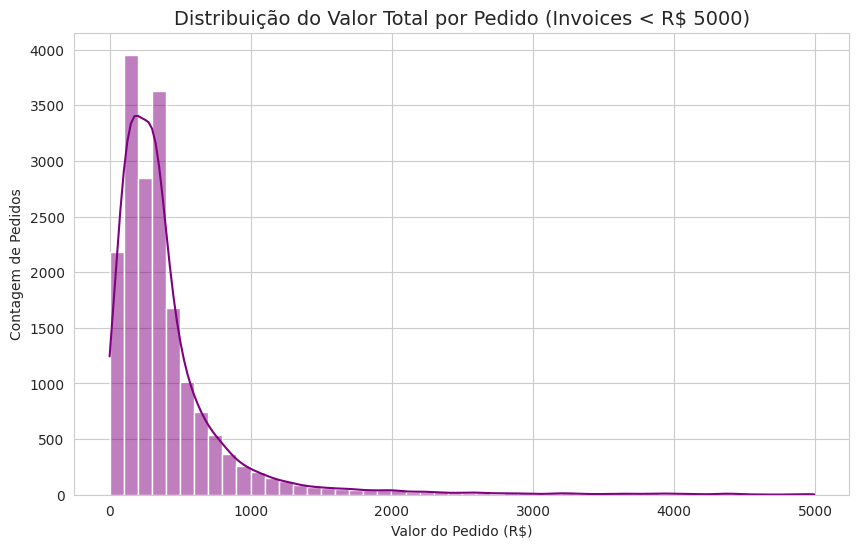

In [ ]:
#3. Qual é o valor médio de um pedido (agrupando por Nro. da Fatura) e qual é o pedido de maior valor registrado?
# 1. Calcular o valor total (Receita) para cada pedido (FaturaNro)
fatura_valortotal = df.groupby('FaturaNro')['ValorTotal'].sum()

# 2. Calcular o valor médio e o valor máximo
mean_fatura_valor = fatura_valortotal.mean()
max_fatura_valor = fatura_valortotal.max()
max_fatura_no = fatura_valortotal.idxmax()

print("\n--- 4. Análise do Valor do Pedido (Carrinho de Compras) ---\n")
print(f"Valor Médio de um Pedido: R$ {mean_fatura_valor:,.2f}")
print(f"Valor Máximo de um Pedido: R$ {max_fatura_valor:,.2f} (Invoice No: {max_fatura_no})")

# 3. Visualização (Histograma do Valor do Pedido)
plt.figure(figsize=(10, 6))
# Filtrar valores para o histograma para melhor visualização (ex: pedidos abaixo de R$ 5000)
sns.histplot(fatura_valortotal[fatura_valortotal < 5000], bins=50, kde=True, color='purple')
plt.title('Distribuição do Valor Total por Pedido (Invoices < R$ 5000)', fontsize=14)
plt.xlabel('Valor do Pedido (R$)')
plt.ylabel('Contagem de Pedidos')
plt.show()

In [ ]:
#4. Quais são os 5 clientes (top Five) que mais gastaram no período total do dataset?
# 1. Agrupar por Clientee calcular o gasto total (Receita)
cliente_total_gasto = df.groupby('CodCliente')['ValorTotal'].sum()

# 2. Selecionar o Top 5
top_5_clientes = cliente_total_gasto.nlargest(5).sort_values(ascending=True)

print("\n--- 5. Top 5 Clientes por Gasto Total  ---\n")
print(top_5_clientes.to_markdown(numalign="left", stralign="left"))


--- 5. Top 5 Clientes por Gasto Total  ---

| CodCliente   | ValorTotal   |
|:-------------|:-------------|
| 14911        | 143825       |
| 16446        | 168472       |
| 17450        | 194551       |
| 18102        | 259657       |
| 14646        | 280206       |


/tmp/ipython-input-4250036489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FaturaMes'] = df['DataFatura'].dt.month



--- 6. Análise de Sazonalidade (Receita Mensal) ---

Mês de Maior Receita: 11 (R$ 1,161,817.38)
Mês de Menor Receita: 2 (R$ 447,137.35)


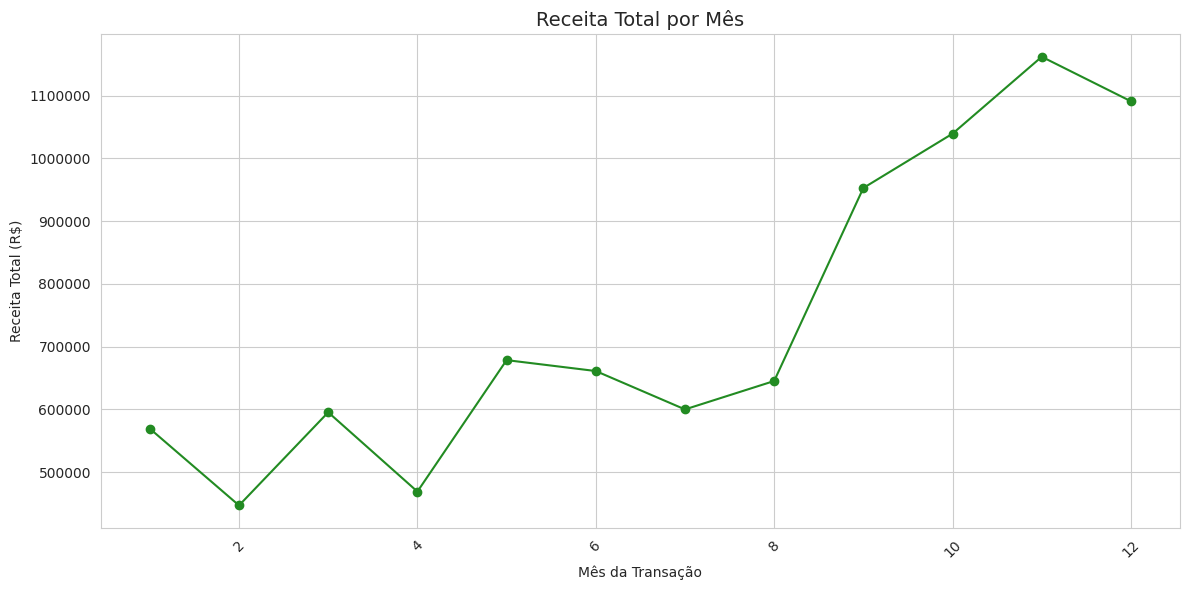

In [ ]:
#5. Existe alguma sazonalidade nas vendas? Qual é o mês com maior e menor receita registrada?
# 1. Criar coluna de Mês/Ano para agregação
df['FaturaMes'] = df['DataFatura'].dt.month

# 2. Agrupar por Mês e somar a Receita
mensal_valortotal = df.groupby('FaturaMes')['ValorTotal'].sum()

# 3. Encontrar o máximo e o mínimo
max_mes = mensal_valortotal.idxmax()
min_mes = mensal_valortotal.idxmin()

print("\n--- 6. Análise de Sazonalidade (Receita Mensal) ---\n")
print(f"Mês de Maior Receita: {max_mes} (R$ {mensal_valortotal.max():,.2f})")
print(f"Mês de Menor Receita: {min_mes} (R$ {mensal_valortotal.min():,.2f})")

# 4. Visualização (Gráfico de Linha)
plt.figure(figsize=(12, 6))
mensal_valortotal.plot(kind='line', marker='o', color='forestgreen')
plt.title('Receita Total por Mês', fontsize=14)
plt.xlabel('Mês da Transação')
plt.ylabel('Receita Total (R$)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

#Análise com Inteligência Artificial -> k-means

Responder a pergunta: Quais são os perfis de cliente que temos, considerando o seu perfil de compra por mês e valor total em compras?

1. Valor Monetário (M)      : Gasto total do cliente.
2. Frequência (F)           : Número de pedidos únicos do cliente.
3. Mês Médio de Compra (APM): O mês médio em que o cliente realiza suas compras, simplificando a análise sazonal.

In [ ]:
#bibliotecas
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# 1. Cálculo das Features F, M e APM

# A. Valor Monetário (M) e Frequência (F)
df_segmentation = df.groupby('CodCliente').agg(
    ValorTotal=('ValorTotal', 'sum'),
    Frequencia=('FaturaNro', 'nunique')
).reset_index()

# B. Mês Médio de Compra (APM)
# 2.1. Extrair o número do mês (1 a 12)
df['FaturaMes'] = df['DataFatura'].dt.month

# 2.2. Calcular o mês médio de compra para cada cliente (não ficou bom essa parte aqui deveria ser o mês de maior compra do cliente e não a média.)
df_apm = df.groupby('CodCliente')['FaturaMes'].mean().reset_index()
df_apm.rename(columns={'FaturaMes': 'MediaCompraMensal'}, inplace=True)

# 3. Combinar as Features
df_final = df_segmentation.merge(df_apm, on='CodCliente')
df_final

/tmp/ipython-input-2617136310.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FaturaMes'] = df['DataFatura'].dt.month


,CodCliente,ValorTotal,Frequencia,MediaCompraMensal
0,12346,77183.60,1,1.000000
1,12347,4310.00,7,7.598901
2,12348,1797.24,4,8.290323
3,12349,1757.55,1,11.000000
4,12350,334.40,1,2.000000
...,...,...,...,...
4333,18280,180.60,1,3.000000
4334,18281,80.82,1,6.000000
4335,18282,178.05,2,9.666667
4336,18283,2094.88,16,7.279101


In [ ]:
# Definindo as features
X = df_final[['Frequencia', 'ValorTotal', 'MediaCompraMensal']]
X

,Frequencia,ValorTotal,MediaCompraMensal
0,1,77183.60,1.000000
1,7,4310.00,7.598901
2,4,1797.24,8.290323
3,1,1757.55,11.000000
4,1,334.40,2.000000
...,...,...,...
4333,1,180.60,3.000000
4334,1,80.82,6.000000
4335,2,178.05,9.666667
4336,16,2094.88,7.279101


In [ ]:
# 1. Escalonamento dos Dados (Fundamental para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled

,Frequencia,ValorTotal,MediaCompraMensal
0,-0.425097,8.358668,-2.420305
1,0.354417,0.250966,0.026683
2,-0.035340,-0.028596,0.283074
3,-0.425097,-0.033012,1.287870
4,-0.425097,-0.191347,-2.049488
...,...,...,...
4333,-0.425097,-0.208459,-1.678670
4334,-0.425097,-0.219560,-0.566218
4335,-0.295178,-0.208742,0.793447
4336,1.523687,0.004519,-0.091905



--- Executando o Método do Cotovelo para encontrar o K ideal ---


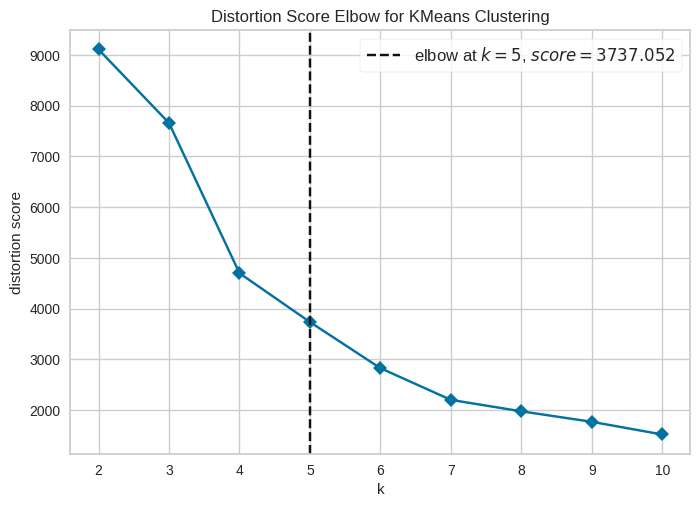

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# 2. Método do Cotovelo (Elbow Method) para encontrar o K ideal
# Avalia K de 2 a 10
print("\n--- Executando o Método do Cotovelo para encontrar o K ideal ---")
model = KMeans(random_state=42, n_init='auto')
visualizer = KElbowVisualizer(model, k=(2, 11), metric='distortion', timings=False, locate_elbow=True)
visualizer.fit(X_scaled)
visualizer.show()


In [ ]:
# O K ideal sugerido será usado (ou K=4, se o gráfico for inconclusivo)
K = visualizer.elbow_value_ if visualizer.elbow_value_i is not None else 4

# 3. Aplicação do K-Means com o K escolhido
kmeans = KMeans(n_clusters=K, random_state=42, n_init='auto')
df_final['Cluster'] = kmeans.fit_predict(X_scaled)
df_final

,CodCliente,ValorTotal,Frequencia,MediaCompraMensal,Cluster
0,12346,77183.60,1,1.000000,2
1,12347,4310.00,7,7.598901,0
2,12348,1797.24,4,8.290323,0
3,12349,1757.55,1,11.000000,3
4,12350,334.40,1,2.000000,4
...,...,...,...,...,...
4333,18280,180.60,1,3.000000,4
4334,18281,80.82,1,6.000000,0
4335,18282,178.05,2,9.666667,3
4336,18283,2094.88,16,7.279101,0


In [ ]:
# 4. Análise e Interpretação dos Clusters

# Média das Variáveis por Cluster (Interpretação)
print(f"\n--- Média das Features por Cluster (K={K}) ---\n")
cluster_summary = df_final.groupby('Cluster')[['Frequencia', 'ValorTotal', 'MediaCompraMensal']].mean().sort_values(by='ValorTotal', ascending=False)
print(cluster_summary.to_markdown(numalign="left", stralign="left", floatfmt=".2f"))



--- Média das Features por Cluster (K=5) ---

| Cluster   | Frequencia   | ValorTotal   | MediaCompraMensal   |
|:----------|:-------------|:-------------|:--------------------|
| 1         | 65.43        | 184143.69    | 7.13                |
| 2         | 42.59        | 28708.45     | 7.24                |
| 0         | 5.94         | 2375.09      | 7.03                |
| 3         | 2.18         | 746.40       | 10.21               |
| 4         | 1.94         | 692.22       | 3.50                |


In [ ]:
# Contagem de Clientes por Cluster
print("\n--- Contagem de Clientes por Cluster ---\n")
print(df_final['Cluster'].value_counts().sort_index().to_markdown(numalign="left", stralign="left"))



--- Contagem de Clientes por Cluster ---

| Cluster   | count   |
|:----------|:--------|
| 0         | 1729    |
| 1         | 7       |
| 2         | 58      |
| 3         | 1657    |
| 4         | 887     |


<Axes: xlabel='Frequencia', ylabel='MediaCompraMensal'>

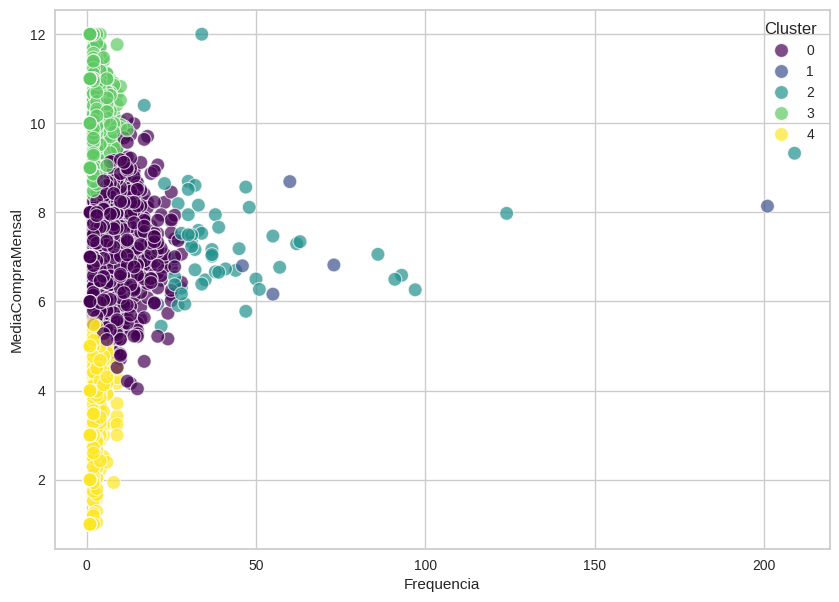

In [ ]:
# GRÁFICO 1: VISUALIZAÇÃO DA NATUREZA DO AGRUPAMENTO (Scatter Plot)
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Frequencia',
    y='MediaCompraMensal',
    hue='Cluster',
    data=df_final,
    palette='viridis',
    s=100,
    alpha=0.7
)

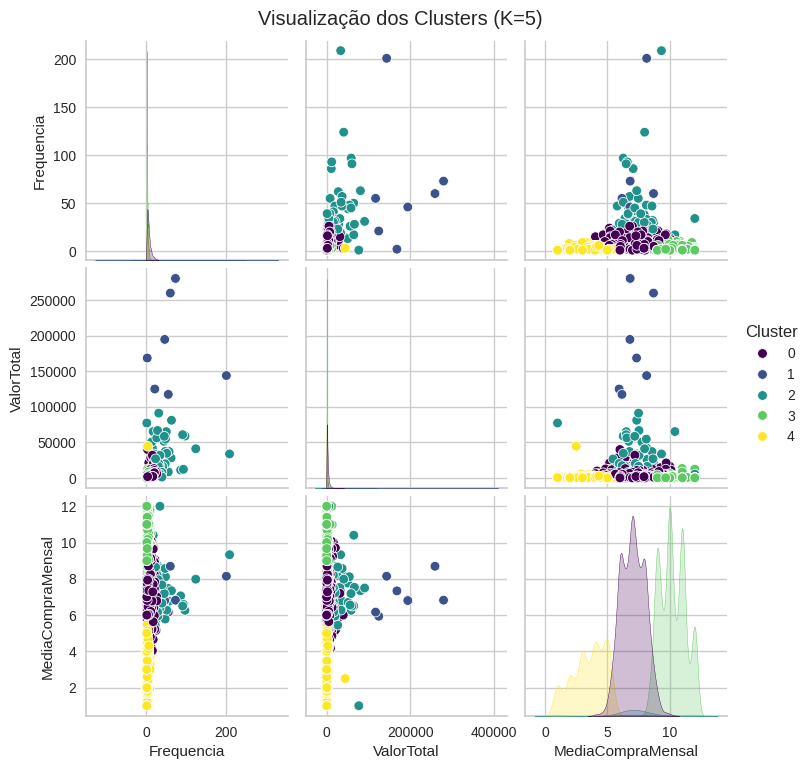

In [ ]:
# 5. Visualização (Scatter Plot de Pares)
# Como temos 3 dimensões, criamos gráficos de pares para visualização
sns.pairplot(df_final, vars=['Frequencia', 'ValorTotal', 'MediaCompraMensal'], hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle(f'Visualização dos Clusters (K={K})', y=1.02)
plt.show()